# Análise Exploratória dos Dados da Base de Dados


O conjunto de dados contém:

README.txt: Este arquivo.

1.  **features_info.txt:** Informação sobre as variáveis usadas no vetor de características.
2.   **features.txt:** Lista de todas as características;
3. **activity_labels.txt:** Relaciona os rótulos das classes com os nomes das atividades;
4.   **train/X_train.txt e test/X_test.txt:** Conjuntos de treinamento e teste;
5.   **train/y_train.txt e test/y_test.txt:** Rótulos de treinamento e teste.



> Os dados de treinamento e teste incluem:


1.   **train/subject_train.txt:** Identifica o participante responsável por cada amostra de janela;
2.  **Arquivos como body_acc_x_train.txt:** Dados de aceleração corporal por eixo (X, Y, Z);
3.  **Arquivos como body_gyro_x_train.txt:** Dados de velocidade angular por eixo (em rad/s).

**Notas**

*   As características foram normalizadas dentro do intervalo [-1, 1];
* As unidades de aceleração são "g" (gravidade da Terra: 9,80665 m/s²);
* As unidades do giroscópio são rad/s;
* Um vídeo com um exemplo das 6 atividades registradas está disponível neste [link](https://youtu.be/XOEN9W05_4A).


# **1. Carregar e Visualizar os Dados**

In [ ]:
import pandas as pd

X_train = pd.read_csv('train/X_train.txt', sep='\s+', header=None)
y_train = pd.read_csv('train/y_train.txt', sep='\s+', header=None)
subject_train = pd.read_csv('train/subject_train.txt', sep='\s+', header=None)


# **2. Entendimento dos Dados**



In [ ]:
print(X_train.shape)
print(X_train.info())

(7352, 561)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB
None




```
# This is formatted as code
```

***Descrições estatísticas:***

In [ ]:
print(X_train.describe())


               0            1            2            3            4    \
count  7352.000000  7352.000000  7352.000000  7352.000000  7352.000000   
mean      0.274488    -0.017695    -0.109141    -0.605438    -0.510938   
std       0.070261     0.040811     0.056635     0.448734     0.502645   
min      -1.000000    -1.000000    -1.000000    -1.000000    -0.999873   
25%       0.262975    -0.024863    -0.120993    -0.992754    -0.978129   
50%       0.277193    -0.017219    -0.108676    -0.946196    -0.851897   
75%       0.288461    -0.010783    -0.097794    -0.242813    -0.034231   
max       1.000000     1.000000     1.000000     1.000000     0.916238   

               5            6            7            8            9    ...  \
count  7352.000000  7352.000000  7352.000000  7352.000000  7352.000000  ...   
mean     -0.604754    -0.630512    -0.526907    -0.606150    -0.468604  ...   
std       0.418687     0.424073     0.485942     0.414122     0.544547  ...   
min      -1.00000

# **3. Análise das Características**

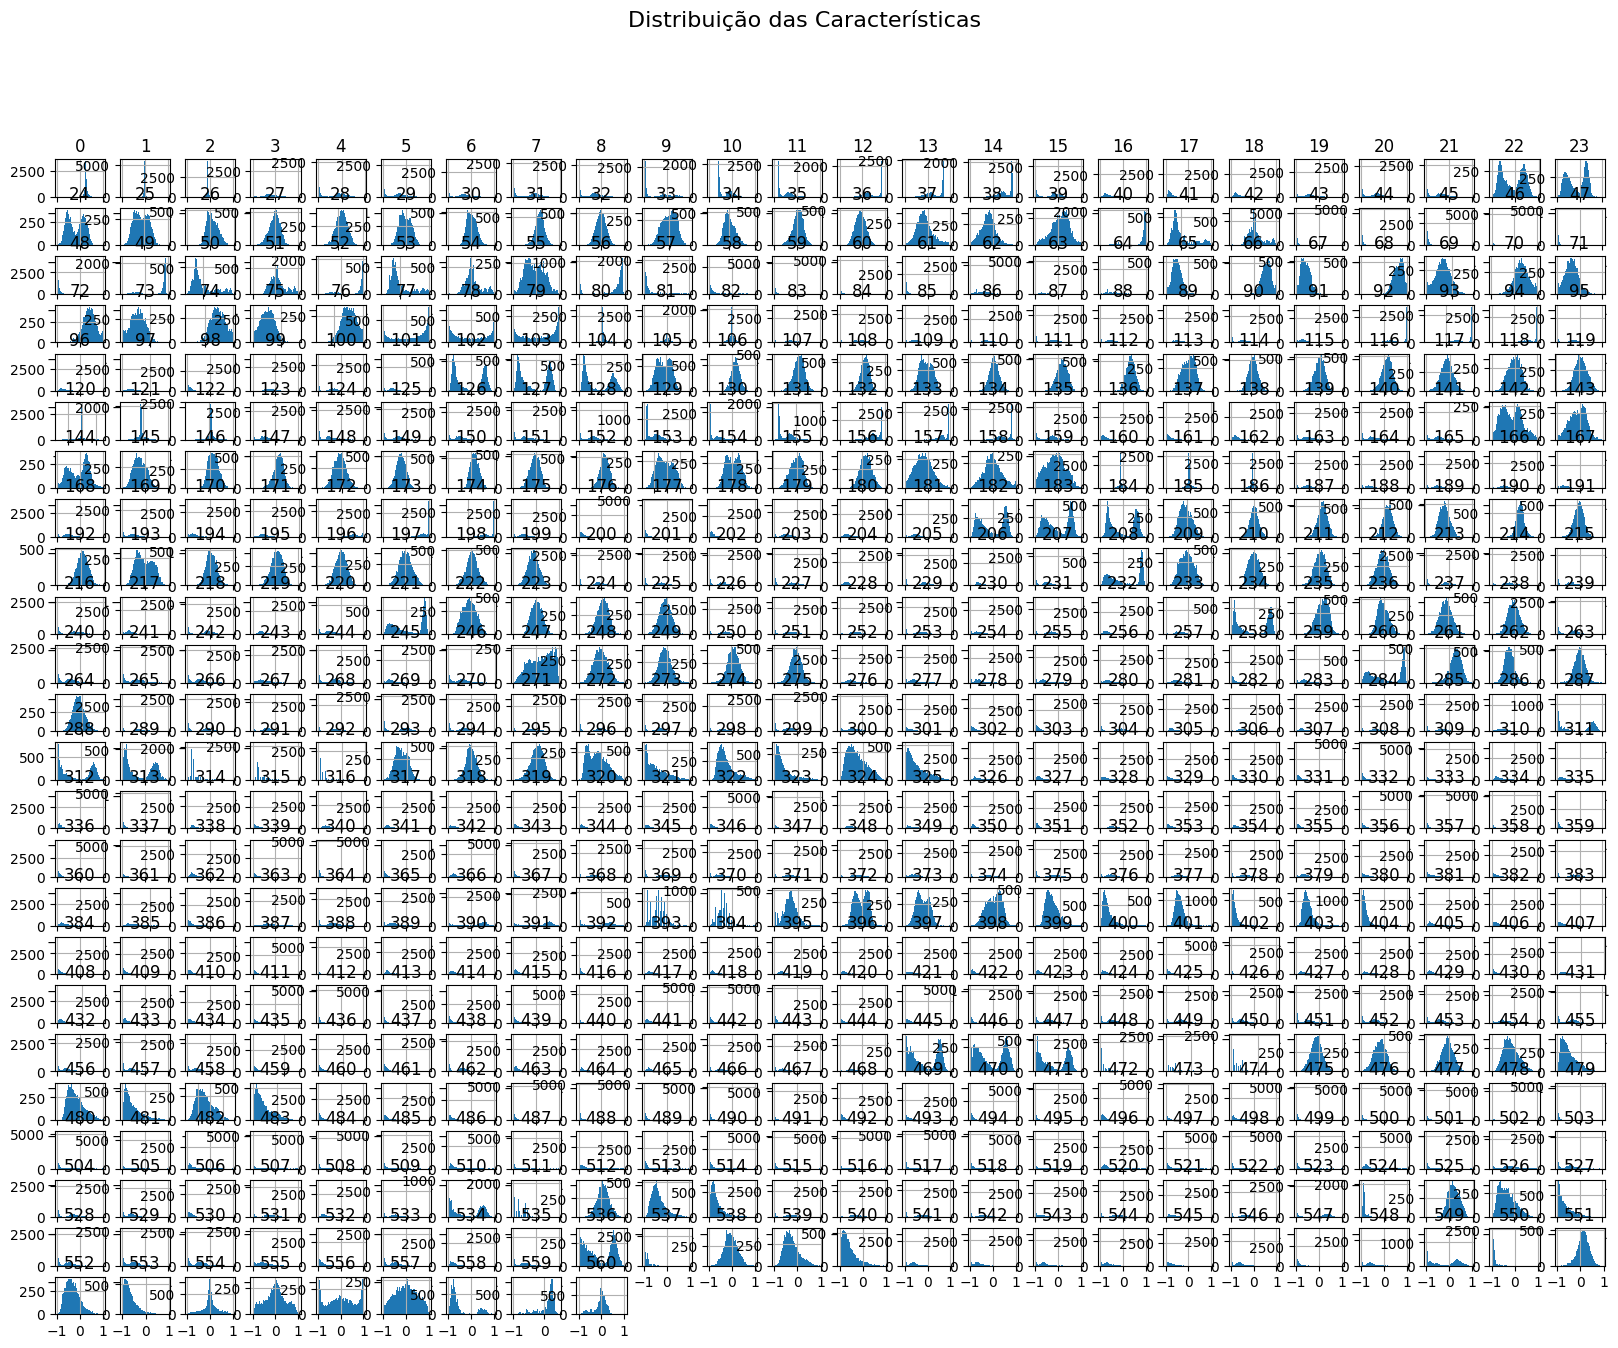

In [ ]:
import matplotlib.pyplot as plt

# Plota os histogramas para cada coluna de X_train
X_train.hist(bins=50, figsize=(20, 15))
plt.suptitle('Distribuição das Características', fontsize=16)
plt.show()


***3.2. Análise Descritiva das Características***

In [ ]:
# Resumo estatístico de todas as características
print(X_train.describe())


               0            1            2            3            4    \
count  7352.000000  7352.000000  7352.000000  7352.000000  7352.000000   
mean      0.274488    -0.017695    -0.109141    -0.605438    -0.510938   
std       0.070261     0.040811     0.056635     0.448734     0.502645   
min      -1.000000    -1.000000    -1.000000    -1.000000    -0.999873   
25%       0.262975    -0.024863    -0.120993    -0.992754    -0.978129   
50%       0.277193    -0.017219    -0.108676    -0.946196    -0.851897   
75%       0.288461    -0.010783    -0.097794    -0.242813    -0.034231   
max       1.000000     1.000000     1.000000     1.000000     0.916238   

               5            6            7            8            9    ...  \
count  7352.000000  7352.000000  7352.000000  7352.000000  7352.000000  ...   
mean     -0.604754    -0.630512    -0.526907    -0.606150    -0.468604  ...   
std       0.418687     0.424073     0.485942     0.414122     0.544547  ...   
min      -1.00000

***Identificação de valores extremos:***


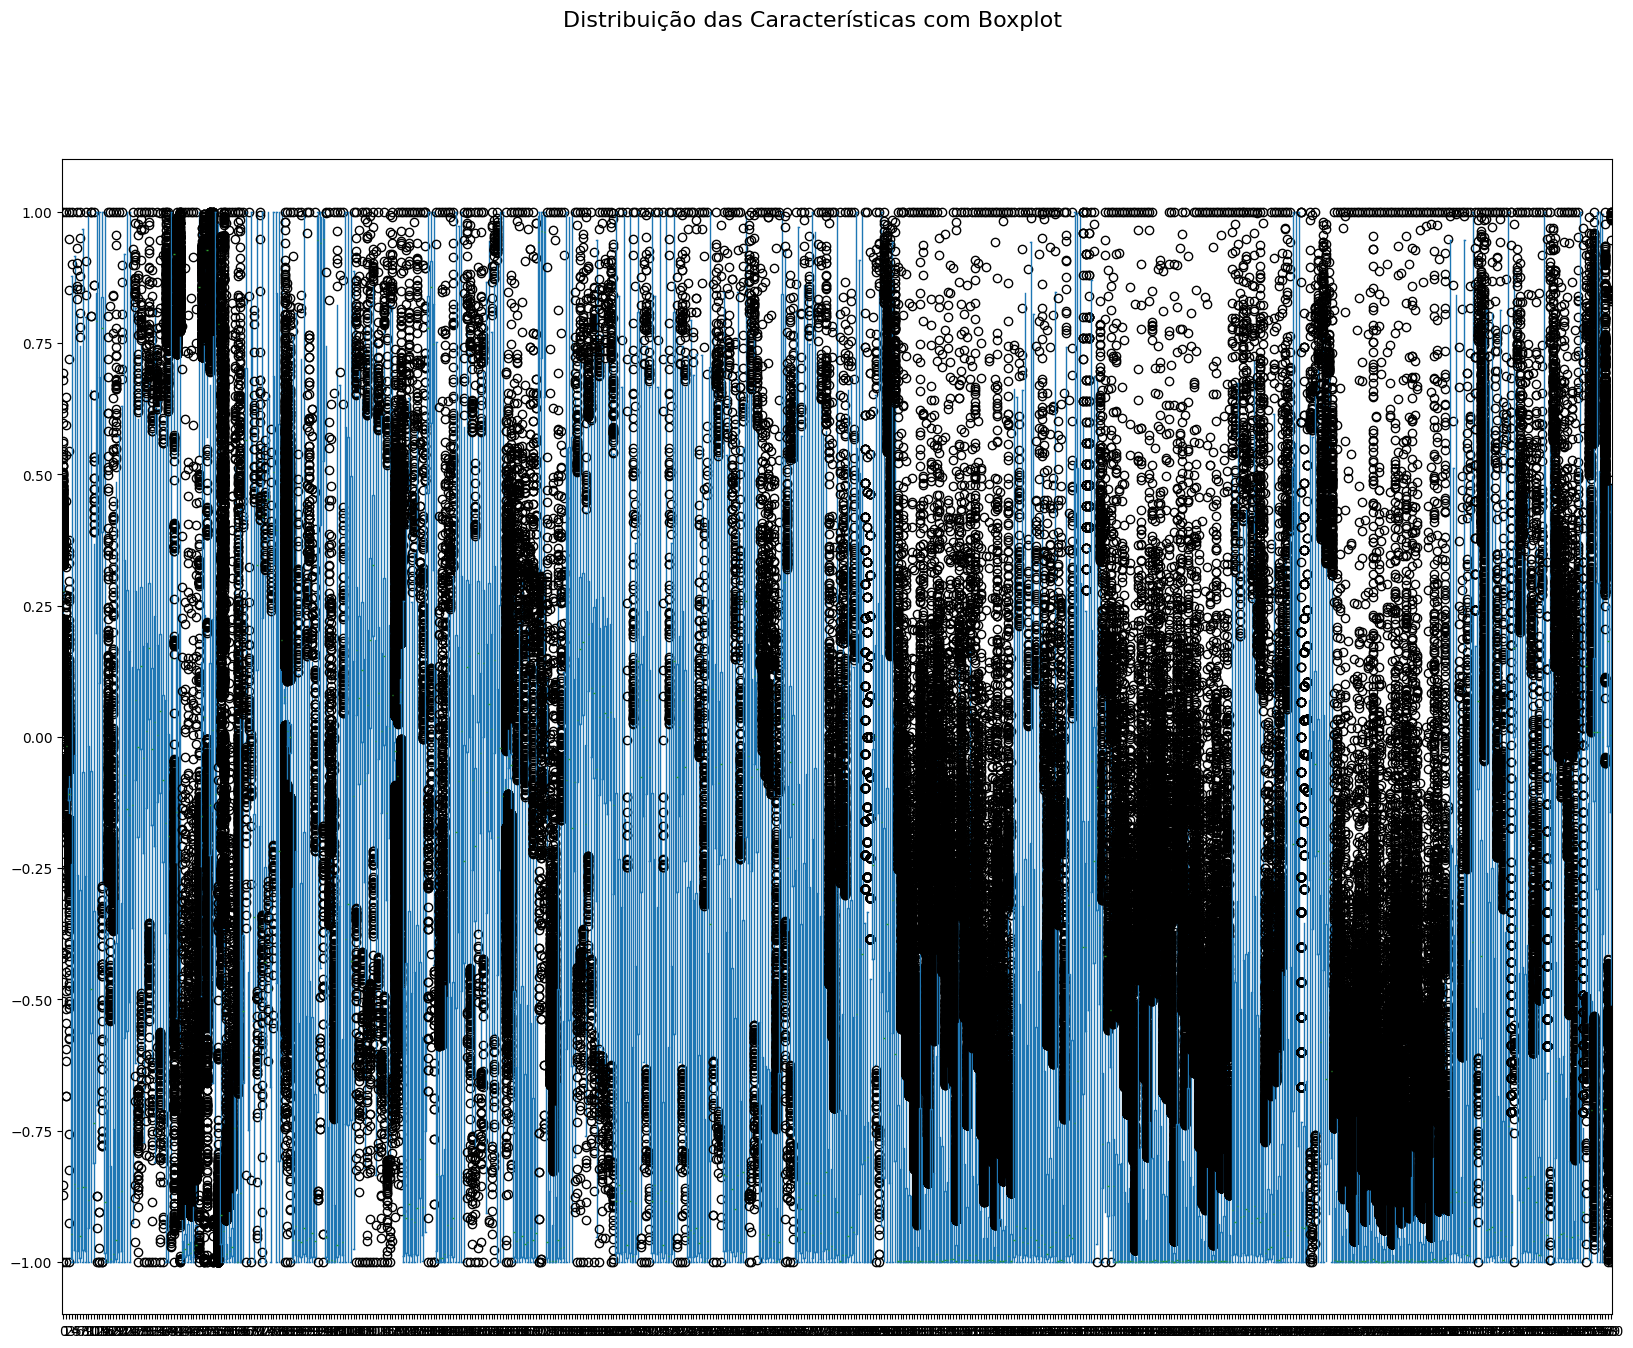

In [ ]:
# Boxplot para identificar outliers
X_train.plot(kind='box', figsize=(20, 15))
plt.suptitle('Distribuição das Características com Boxplot', fontsize=16)
plt.show()


**Subconjunto de Dados**

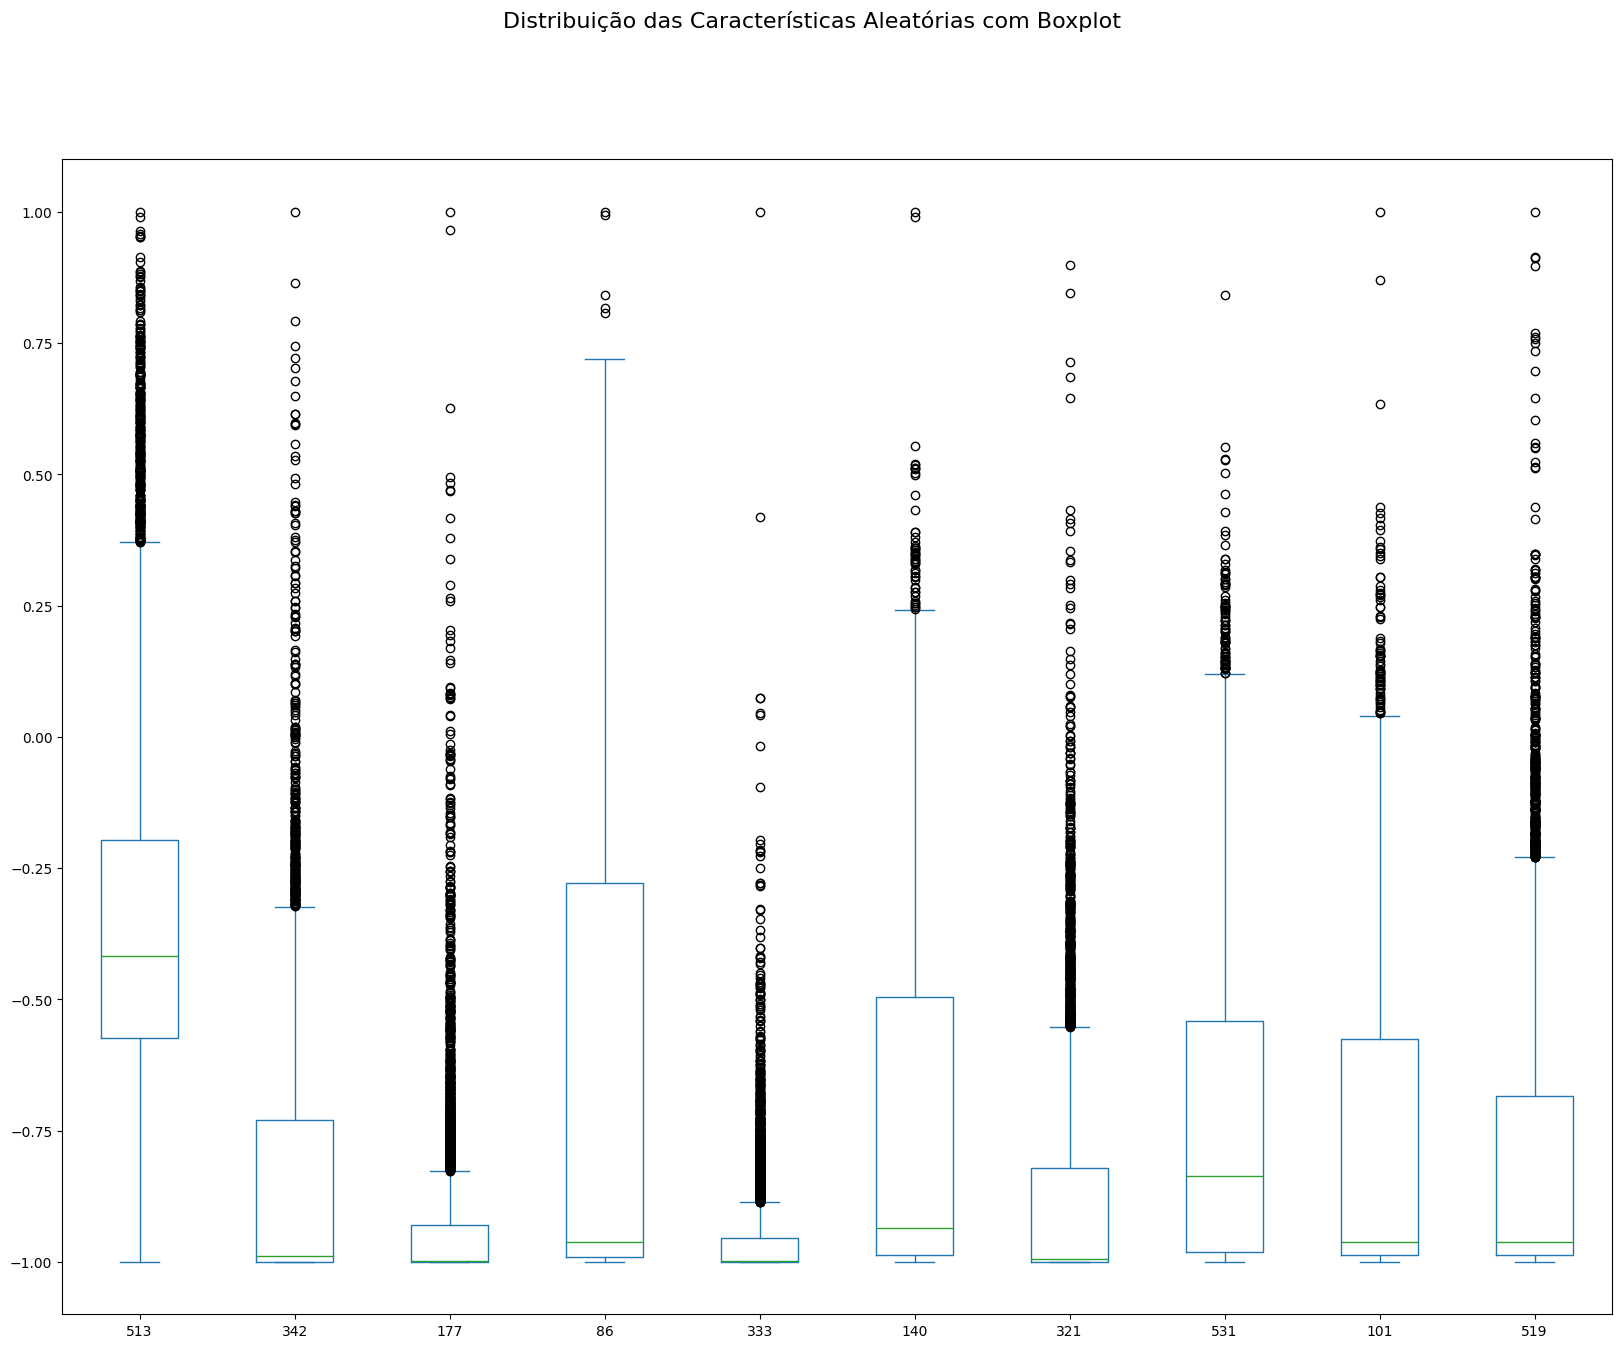

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Seleciona aleatoriamente 10 colunas de X_train
random_columns = X_train.sample(n=10, axis=1, random_state=42)

# Cria um boxplot para as variáveis aleatórias selecionadas
random_columns.plot(kind='box', figsize=(20, 15))
plt.suptitle('Distribuição das Características Aleatórias com Boxplot', fontsize=16)
plt.show()


***3.3. Correlação entre as Características***



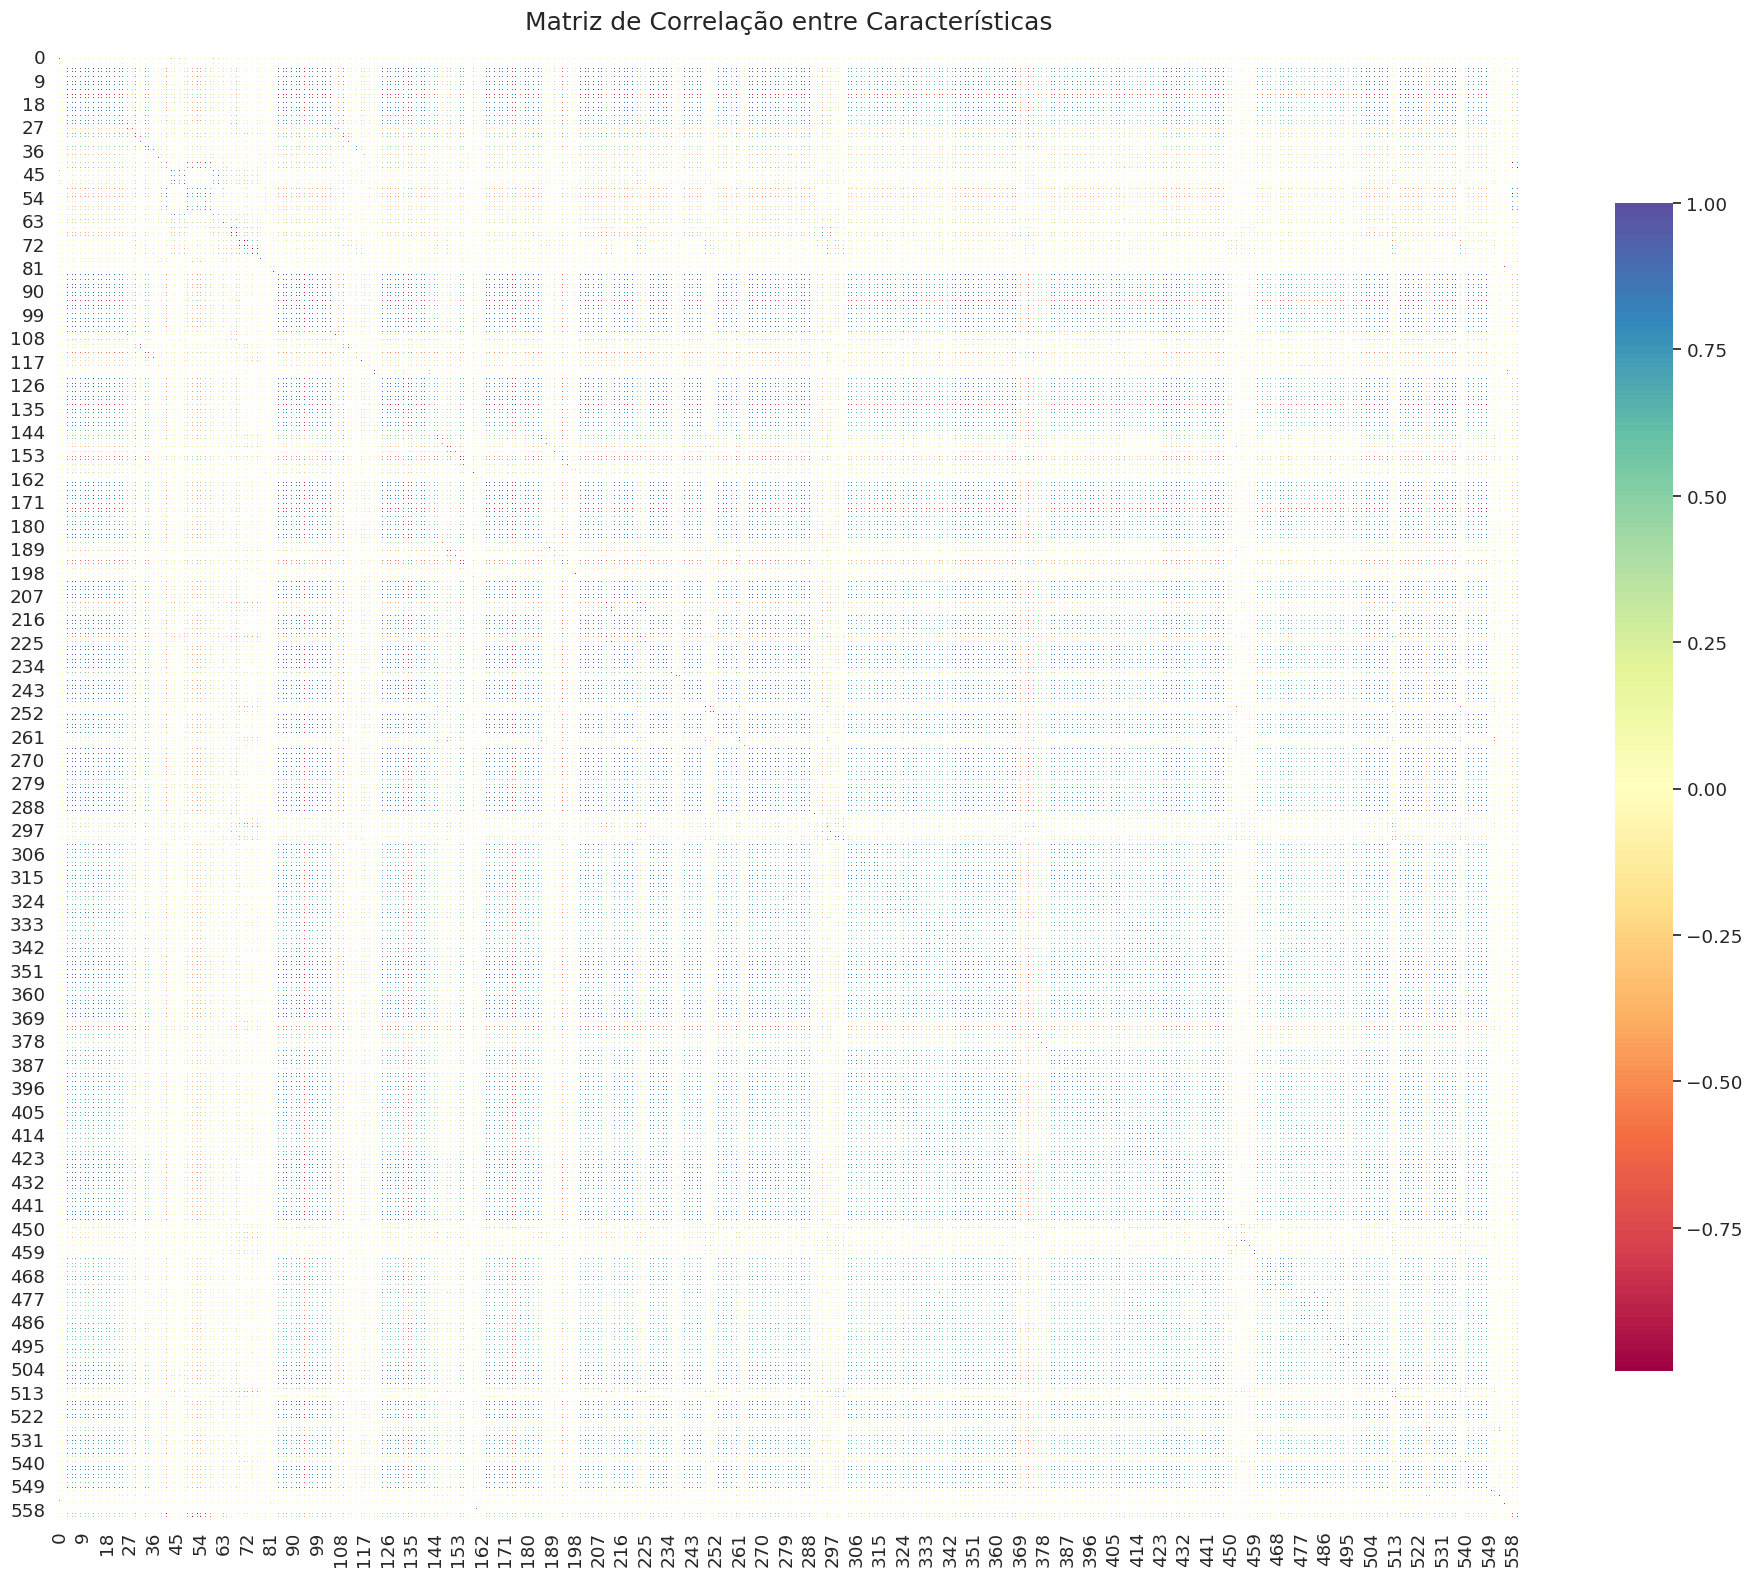

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a matriz de correlação
corr = X_train.corr()

# Configurações para um gráfico mais limpo e legível
plt.figure(figsize=(20, 16))
sns.set(font_scale=1.2)  # Ajusta o tamanho da fonte para melhor leitura
sns.heatmap(
    corr,
    annot=False,  # Você pode mudar para True para mostrar os valores de correlação
    cmap='Spectral',  # Alternativa de cores mais perceptível
    cbar_kws={'shrink': 0.8},  # Ajusta o tamanho da barra de cores
    linewidths=0.3,  # Linhas entre os blocos para separar melhor
    square=True  # Mantém os quadrados proporcionais
)

# Título e ajustes finais
plt.title('Matriz de Correlação entre Características', fontsize=18, pad=20)
plt.tight_layout()
plt.show()


**Subconjunto para a matriz de dados**

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Limite de correlação
threshold = 0.7

# Filtrar correlações fortes
corr = X_train.corr()
corr_filtered = corr[(np.abs(corr) > threshold) & (corr != 1.0)]

# Configura a visualização
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_filtered,
    cmap="coolwarm",
    annot=True,  # Exibe os valores das correlações
    fmt=".2f",
    cbar=True,
    linewidths=0.5,
    vmin=-1, vmax=1
)
plt.title("Matriz de Correlação (|correlation| > 0.7)", fontsize=16, pad=20)
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

***3.4. Análise das Características em Função das Atividades***

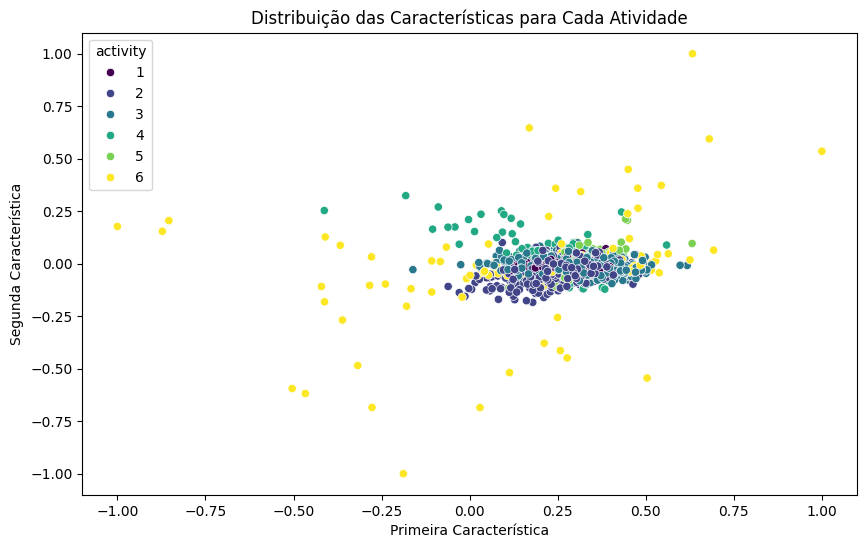

In [ ]:
# Adiciona a coluna 'activity' ao DataFrame X_train
X_train['activity'] = y_train[0]

# Plotando para duas características quaisquer (exemplo: primeira e segunda)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train.iloc[:, 0], y=X_train.iloc[:, 1], hue='activity', palette='viridis', data=X_train)
plt.title('Distribuição das Características para Cada Atividade')
plt.xlabel('Primeira Característica')
plt.ylabel('Segunda Característica')
plt.show()



> **Boxplots por atividade:**




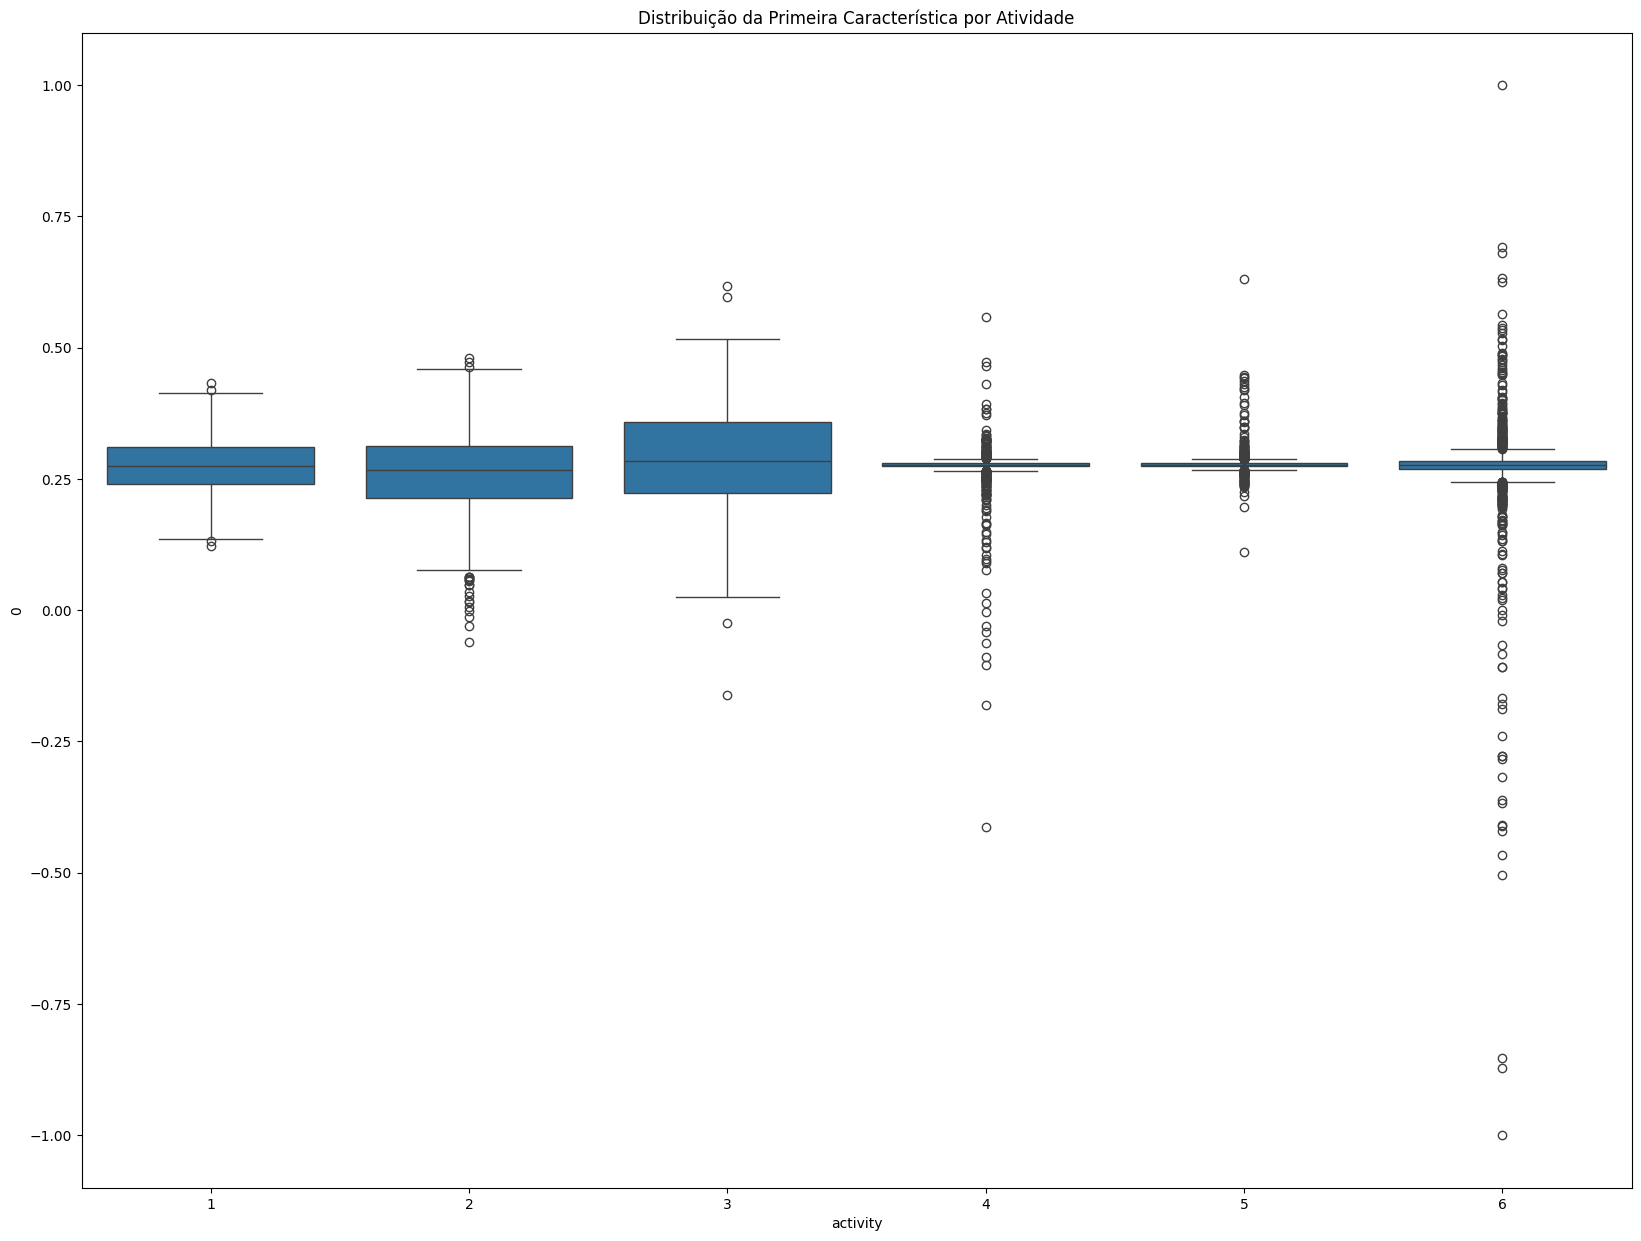

In [ ]:
# Boxplots para visualizar as distribuições das características por atividade
plt.figure(figsize=(20, 15))
sns.boxplot(x='activity', y=X_train.columns[0], data=X_train)
plt.title('Distribuição da Primeira Característica por Atividade')
plt.show()

# Repetir para outras características se necessário


***3.5. Análise Temporal (Opcional)***


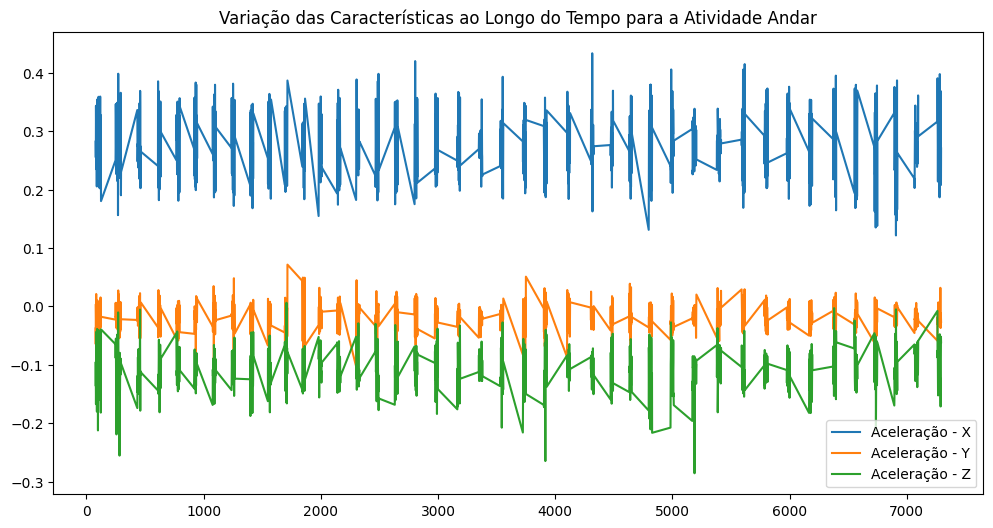

In [ ]:
# Seleciona uma atividade específica para observar o comportamento ao longo do tempo
activity_filter = X_train[X_train['activity'] == 1]  # Por exemplo, a atividade '1' (andar)

# Plotando as variações das características ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(activity_filter.iloc[:, 0], label='Aceleração - X')
plt.plot(activity_filter.iloc[:, 1], label='Aceleração - Y')
plt.plot(activity_filter.iloc[:, 2], label='Aceleração - Z')
plt.title('Variação das Características ao Longo do Tempo para a Atividade Andar')
plt.legend()
plt.show()


# **4. Análise das Atividades**


***Distribuição das atividades:***


0
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


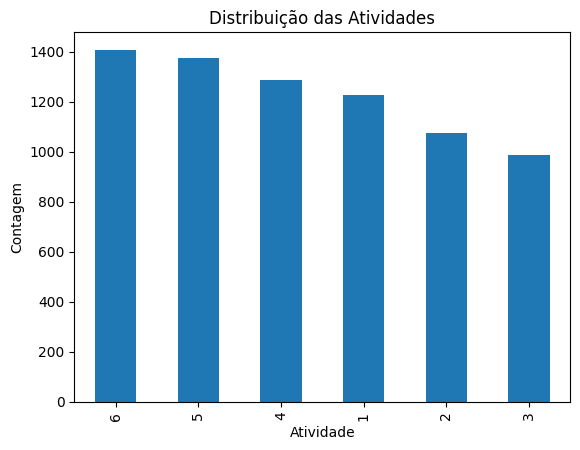

In [ ]:
activity_counts = y_train[0].value_counts()
print(activity_counts)
activity_counts.plot(kind='bar')
plt.title("Distribuição das Atividades")
plt.xlabel("Atividade")
plt.ylabel("Contagem")
plt.show()


***Visualização das atividades em relação a variáveis:***


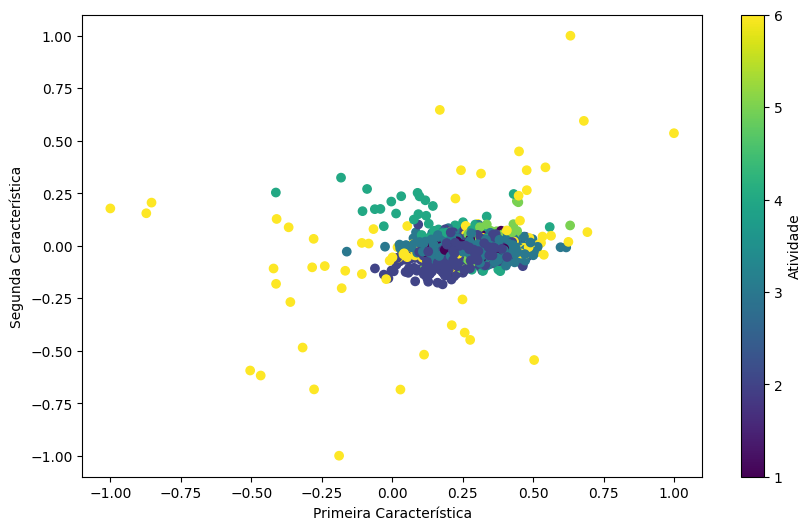

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train[0], cmap='viridis')
plt.colorbar(label='Atividade')
plt.xlabel('Primeira Característica')
plt.ylabel('Segunda Característica')
plt.show()


# **5. Análise de Outliers**


In [ ]:
import numpy as np
from scipy import stats
Z = np.abs(stats.zscore(X_train))
outliers = (Z > 3).sum(axis=0)  # Valores com Z-Score superior a 3 são considerados outliers
print(outliers)


0            94
1            64
2           109
3            10
4             0
           ... 
557           0
558           0
559          87
560          73
activity      0
Length: 562, dtype: int64


# **6. Pré-processamento de Dados**


***Passo 1: Verificar os Tipos de Dados***


In [ ]:
# Verifique os tipos de dados em X_train
print(X_train.dtypes)


0           float64
1           float64
2           float64
3           float64
4           float64
             ...   
557         float64
558         float64
559         float64
560         float64
activity      int64
Length: 562, dtype: object


***2.1: Remover Colunas Não Numéricas***

In [ ]:
# Remover colunas de tipos não numéricos (strings, por exemplo)
X_train = X_train.select_dtypes(include=['float64', 'int64'])


***2.2: Converter Colunas para Numéricas (Se Necessário)***


In [ ]:
# Converter todas as colunas para numéricas (se necessário)
X_train = X_train.apply(pd.to_numeric, errors='coerce')  # 'coerce' substitui valores não numéricos por NaN


**Passo 3: Aplicar o MinMaxScaler**

***Verifique se há valores ausentes:***

In [ ]:
print(X_train.isnull().sum())  # Mostra o número de valores ausentes por coluna


0           0
1           0
2           0
3           0
4           0
           ..
557         0
558         0
559         0
560         0
activity    0
Length: 562, dtype: int64


In [ ]:
# Substituir NaN pela média de cada coluna
X_train = X_train.fillna(X_train.mean())

# Ou, caso prefira remover linhas com NaN
# X_train = X_train.dropna()


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Carregue os dados (substitua pelo caminho correto do arquivo)
X_train = pd.read_csv('train/X_train.txt', sep='\s+', header=None)

# Verifique a forma de X_train (deve ser 2D)
print(X_train.shape)

# Se X_train for 1D, converta para 2D (se necessário)
if len(X_train.shape) == 1:
    X_train = X_train.values.reshape(-1, 1)

# Verifique se há valores NaN em X_train
print(X_train.isnull().sum())

# Substitua NaNs pela média de cada coluna (ou outra estratégia)
X_train = X_train.fillna(X_train.mean())

# Remova qualquer coluna não numérica
X_train = X_train.select_dtypes(include=['float64', 'int64'])

# Inicialize o MinMaxScaler com o intervalo desejado
scaler = MinMaxScaler(feature_range=(-1, 1))

# Aplique o MinMaxScaler
X_train_normalized = scaler.fit_transform(X_train)

# Verifique o resultado
print(X_train_normalized[:5])  # Exibe as 5 primeiras linhas dos dados normalizados


(7352, 561)
0      0
1      0
2      0
3      0
4      0
      ..
556    0
557    0
558    0
559    0
560    0
Length: 561, dtype: int64
[[ 0.28858451 -0.02029417 -0.13290514 ... -0.84124676  0.59650206
  -0.05862692]
 [ 0.27841883 -0.01641057 -0.12352019 ... -0.8447876   0.59697329
  -0.05431672]
 [ 0.27965306 -0.01946716 -0.11346169 ... -0.84893347  0.59744472
  -0.04911782]
 [ 0.27917394 -0.02620065 -0.12328257 ... -0.84864938  0.59920022
  -0.04766318]
 [ 0.27662877 -0.01656965 -0.11536185 ... -0.84786525  0.60355212
  -0.04389225]]


# **7. Análise Temporal (Opicional)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar dados (ajuste conforme o seu caminho de arquivos)
X_train = pd.read_csv('train/X_train.txt', sep='\s+', header=None)
y_train = pd.read_csv('train/y_train.txt', sep='\s+', header=None)
subject_train = pd.read_csv('train/subject_train.txt', sep='\s+', header=None)

# Verificar os dados
print(X_train.head())
print(y_train.head())


        0         1         2         3         4         5         6    \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2  0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4  0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

        7         8         9    ...       551       552       553       554  \
0 -0.983185 -0.923527 -0.934724  ... -0.074323 -0.298676 -0.710304 -0.112754   
1 -0.974914 -0.957686 -0.943068  ...  0.158075 -0.595051 -0.861499  0.053477   
2 -0.963668 -0.977469 -0.938692  ...  0.414503 -0.390748 -0.760104 -0.118559   
3 -0.982750 -0.989302 -0.938692  ...  0.404573 -0.117290 -0.482845 -0.036788   
4 -0.979672 -0.990441 -0.942469  ...  0.087753 -0.351471 -0.699205  0.123320   

        555       556       557       558       559       560  
0  0

***Filtrar uma atividade específica (por exemplo, "andar")***

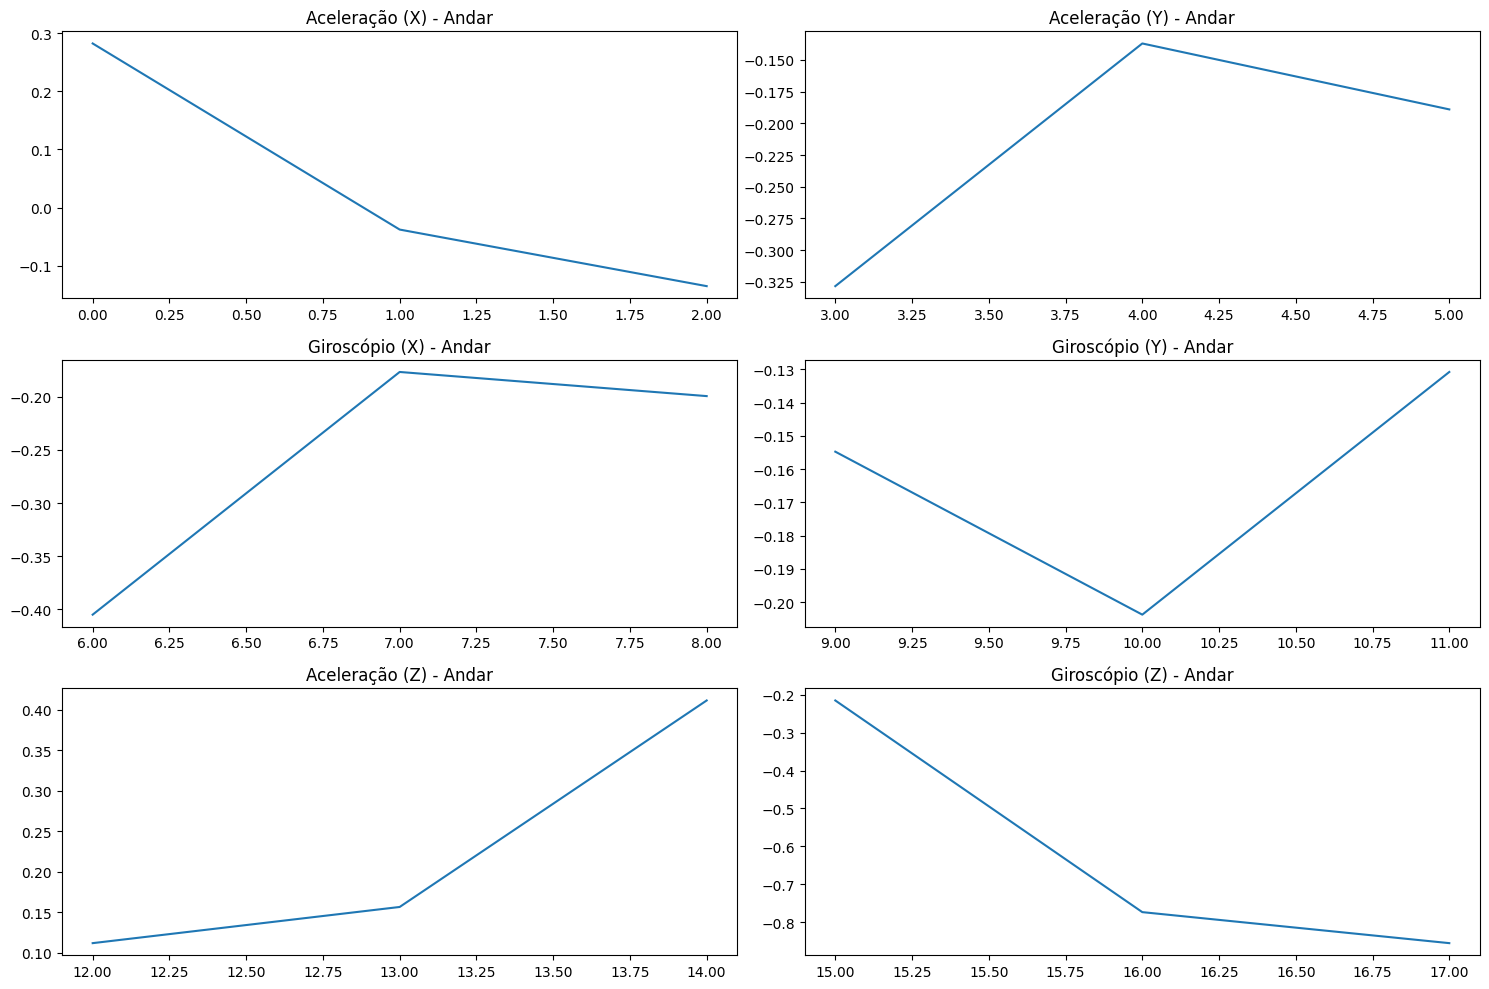

In [ ]:
# Adicionar o rótulo da atividade ao DataFrame
X_train['activity'] = y_train

# Filtrar os dados para a atividade 'andar' (atividade 1)
activity_walk = X_train[X_train['activity'] == 1].drop(columns=['activity'])

# Visualizar os sinais de aceleração e giroscópio ao longo do tempo
# Aqui estamos considerando as 3 colunas de aceleração (X, Y, Z) e giroscópio (X, Y, Z)
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

# Aceleração
axs[0, 0].plot(activity_walk.iloc[0, 0:3])  # Aceleração no eixo X
axs[0, 0].set_title("Aceleração (X) - Andar")
axs[0, 1].plot(activity_walk.iloc[0, 3:6])  # Aceleração no eixo Y
axs[0, 1].set_title("Aceleração (Y) - Andar")

# Giroscópio
axs[1, 0].plot(activity_walk.iloc[0, 6:9])  # Giroscópio no eixo X
axs[1, 0].set_title("Giroscópio (X) - Andar")
axs[1, 1].plot(activity_walk.iloc[0, 9:12])  # Giroscópio no eixo Y
axs[1, 1].set_title("Giroscópio (Y) - Andar")

# Aceleração (Z) e Giroscópio (Z)
axs[2, 0].plot(activity_walk.iloc[0, 12:15])  # Aceleração no eixo Z
axs[2, 0].set_title("Aceleração (Z) - Andar")
axs[2, 1].plot(activity_walk.iloc[0, 15:18])  # Giroscópio no eixo Z
axs[2, 1].set_title("Giroscópio (Z) - Andar")

plt.tight_layout()
plt.show()


***Passo 4: (Opcional) Analisar outras atividades***


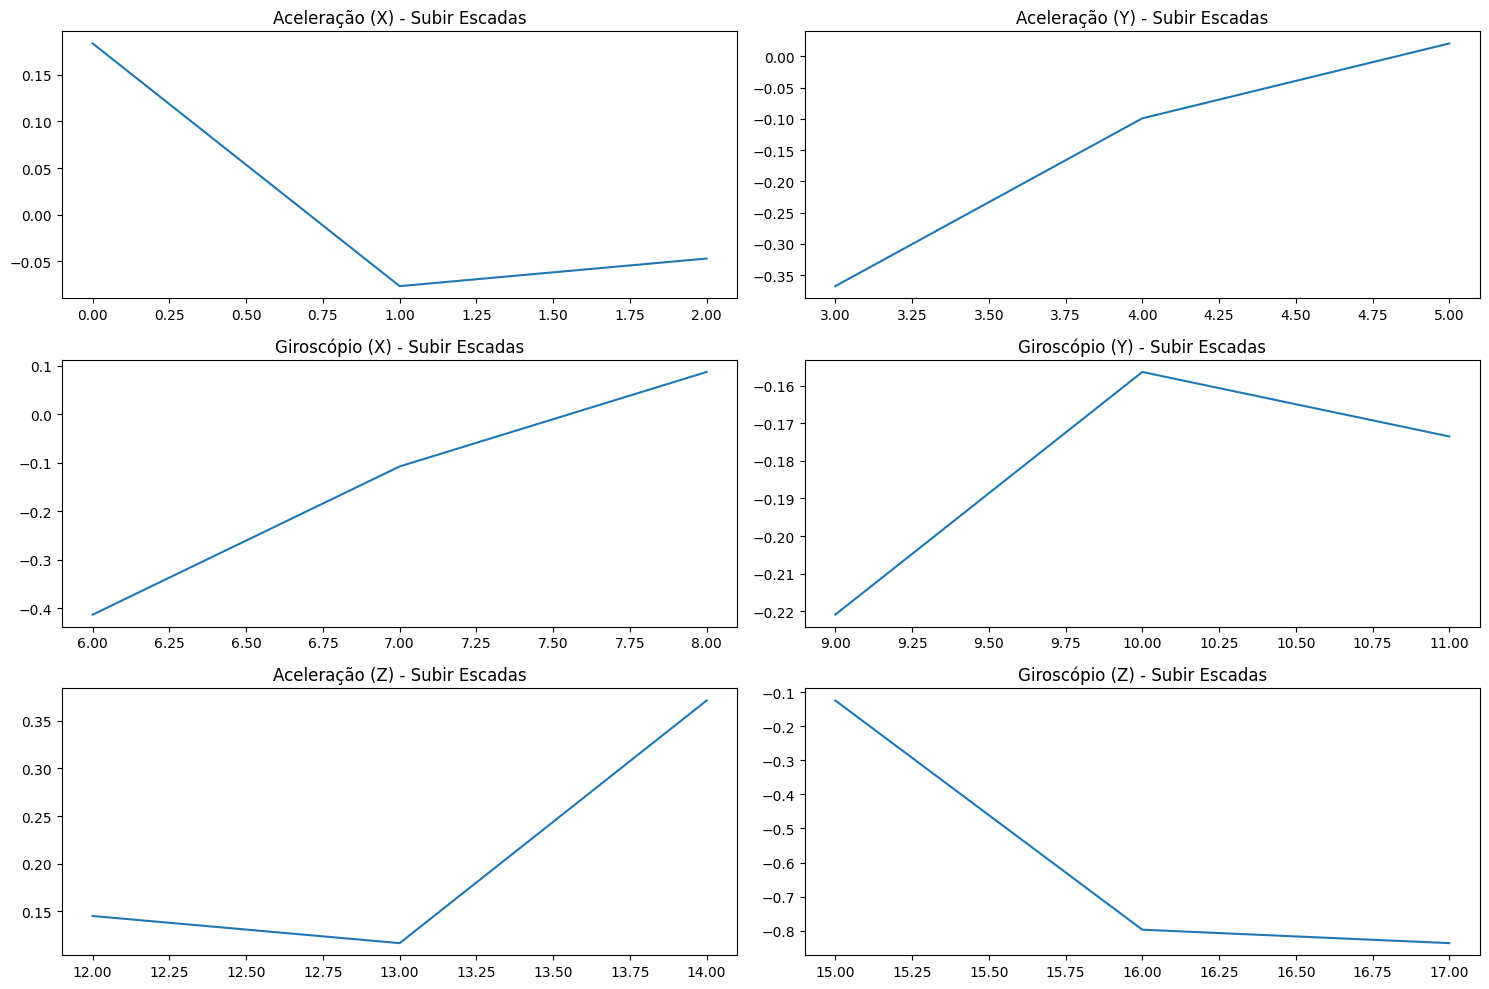

In [ ]:
# Filtrar os dados para outra atividade (exemplo: "subir escadas" que é a atividade 2)
activity_stairs = X_train[X_train['activity'] == 2].drop(columns=['activity'])

# Visualizar os sinais de aceleração e giroscópio para 'subir escadas'
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

# Aceleração
axs[0, 0].plot(activity_stairs.iloc[0, 0:3])  # Aceleração no eixo X
axs[0, 0].set_title("Aceleração (X) - Subir Escadas")
axs[0, 1].plot(activity_stairs.iloc[0, 3:6])  # Aceleração no eixo Y
axs[0, 1].set_title("Aceleração (Y) - Subir Escadas")

# Giroscópio
axs[1, 0].plot(activity_stairs.iloc[0, 6:9])  # Giroscópio no eixo X
axs[1, 0].set_title("Giroscópio (X) - Subir Escadas")
axs[1, 1].plot(activity_stairs.iloc[0, 9:12])  # Giroscópio no eixo Y
axs[1, 1].set_title("Giroscópio (Y) - Subir Escadas")

# Aceleração (Z) e Giroscópio (Z)
axs[2, 0].plot(activity_stairs.iloc[0, 12:15])  # Aceleração no eixo Z
axs[2, 0].set_title("Aceleração (Z) - Subir Escadas")
axs[2, 1].plot(activity_stairs.iloc[0, 15:18])  # Giroscópio no eixo Z
axs[2, 1].set_title("Giroscópio (Z) - Subir Escadas")

plt.tight_layout()
plt.show()


# **8. Compreensão do Participante**


In [ ]:
subject_counts = subject_train[0].value_counts()
print(subject_counts)

0
25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: count, dtype: int64


# ***9. Visualização Final***


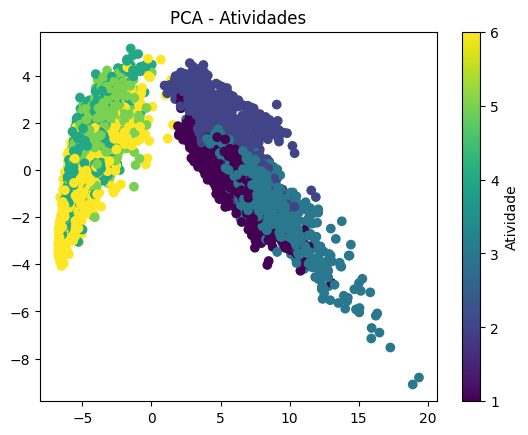

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_normalized)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train[0], cmap='viridis')
plt.colorbar(label='Atividade')
plt.title('PCA - Atividades')
plt.show()


# **10. Conclusões Iniciais**

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir os dados em treino e teste (80% para treino e 20% para teste)
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Verificar as dimensões dos conjuntos
print(f'Tamanho do conjunto de treino: {X_train_split.shape}')
print(f'Tamanho do conjunto de teste: {X_test_split.shape}')


Tamanho do conjunto de treino: (5881, 562)
Tamanho do conjunto de teste: (1471, 562)


# **Implementação do Algoritmo de K-means**
